In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Linear Regression

In [42]:
df = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv', index_col=0)
df2 = pd.read_csv('data/streamflow_prediction_dataset.csv', index_col=0)[['streamflow']]
display(df.columns)

Index(['WTEQ_BisonLake', 'WTEQ_McClurePass', 'PREC_Avg', 'TAVG_Avg',
       'soilmoisture_Avg_2ft', 'soilmoisture_Avg_4ft', 'soilmoisture_Avg_8ft',
       'soilmoisture_Avg_20ft'],
      dtype='object')

In [53]:
def linear_regression(X_col):
    ss = StandardScaler()
    X = ss.fit_transform(df[f'{X_col}'].values.reshape(-1, 1))
    y = ss.fit_transform(df2['streamflow'].values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=np.random.randint(0, 100))
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2_score = lr.score(X_test, y_test)
    
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f'Linear Regression\nR² = {r2_score:.2f}')
    plt.xlabel(f'{X_col}')
    plt.ylabel('Streamflow')
    plt.show()

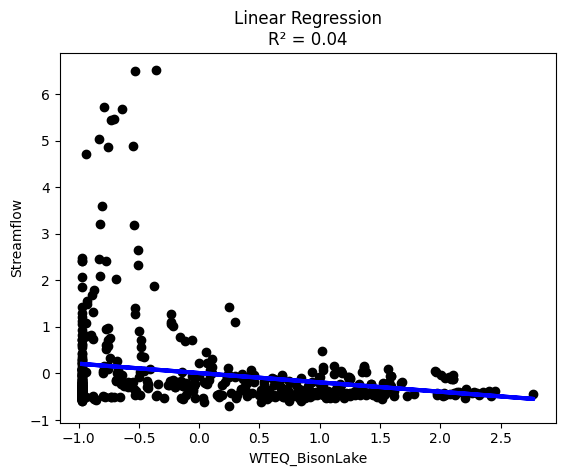

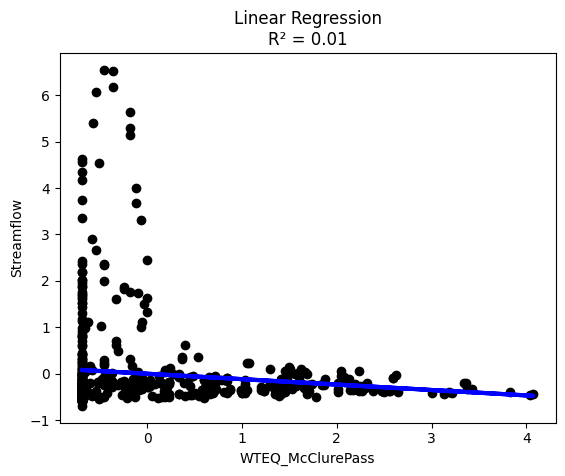

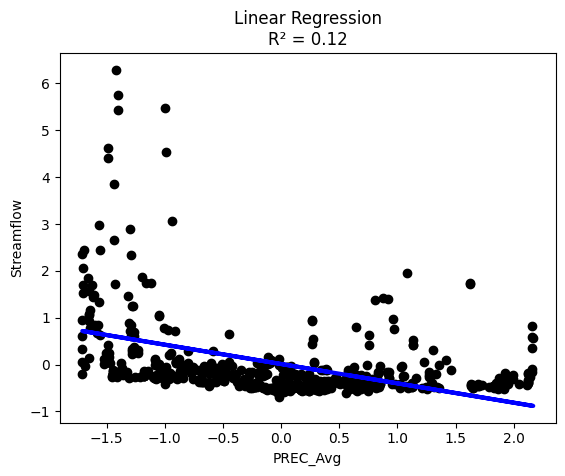

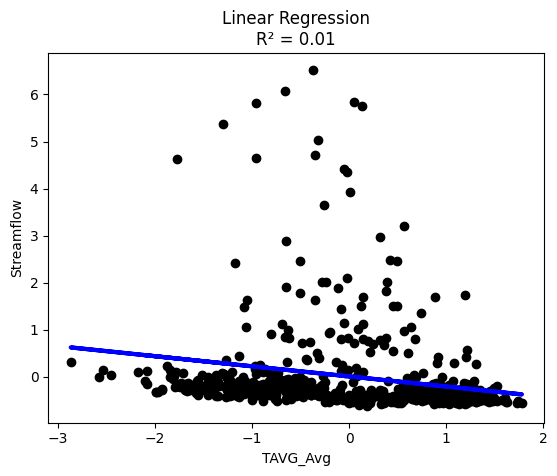

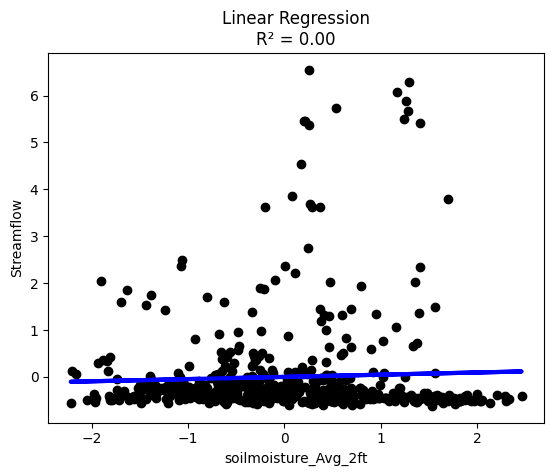

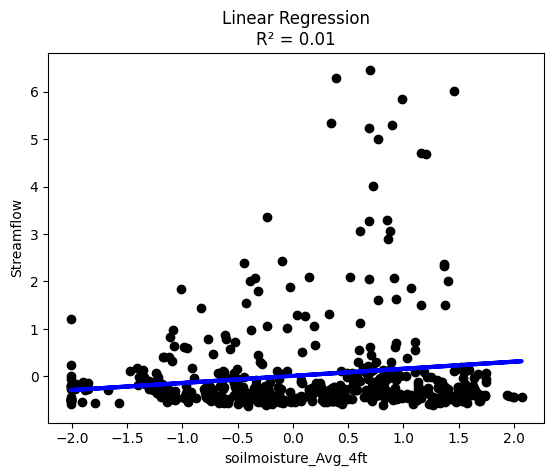

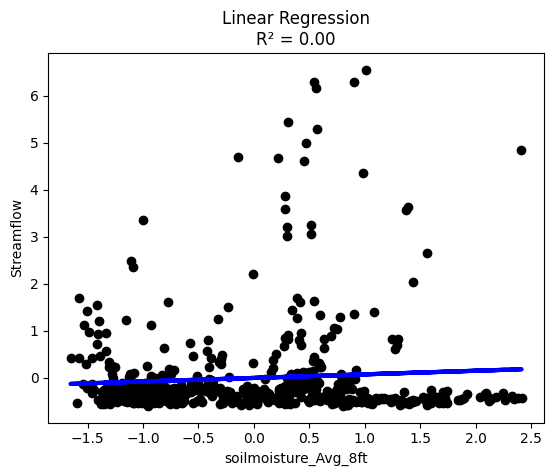

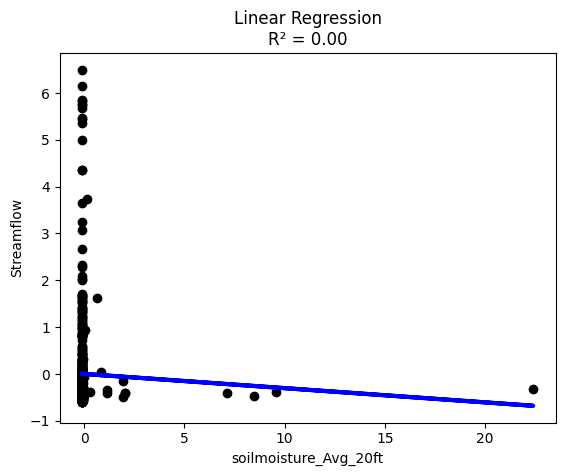

In [54]:
for col in df.columns:
    linear_regression(col)

# MLR

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
df_x = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv', index_col=0)
df_y = pd.read_csv('data/streamflow_prediction_dataset.csv', index_col=0)[['streamflow']]

In [57]:
ss = StandardScaler()
X = ss.fit_transform(df_x.values)
y = ss.fit_transform(df_y.values)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

((2396, 8), (600, 8), (2396, 1), (600, 1))

R² = 0.24
Adjusted R² = 0.23
Model Summary
WTEQ_BisonLake: -0.41
WTEQ_McClurePass: -0.01
PREC_Avg: -0.33
TAVG_Avg: -0.21
soilmoisture_Avg_2ft: 0.05
soilmoisture_Avg_4ft: 0.22
soilmoisture_Avg_8ft: 0.10
soilmoisture_Avg_20ft: -0.02
Intercept: 0.01


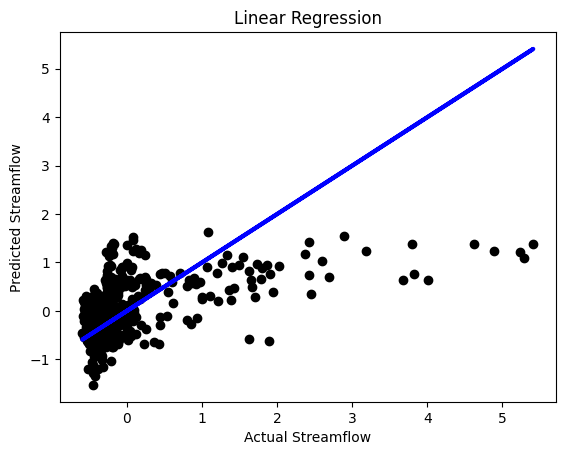

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score = lr.score(X_test, y_test)

# Calculate adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_score = 1 - ((1 - r2_score) * (n - 1) / (n - p - 1))

print(f'R² = {r2_score:.2f}')
print(f'Adjusted R² = {adjusted_r2_score:.2f}')

# Model summary
print('Model Summary')
for col, coef in zip(df_x.columns, lr.coef_[0]):
    print(f'{col}: {coef:.2f}')
print(f'Intercept: {lr.intercept_[0]:.2f}')

plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='blue', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('Actual Streamflow')
plt.ylabel('Predicted Streamflow')
plt.show()

# Kernel Regression